In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Step 2: Load Dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_informative=6, n_redundant=2,
                           n_classes=2, random_state=42)

In [ ]:
# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])

In [ ]:
columns = [
    "annual_income",
    "current_debt",
    "credit_utilization",
    "credit_history_length",
    "num_of_credit_cards",
    "missed_payments",
    "num_of_loans",
    "loan_default_history",
    "monthly_expenses",
    "savings_balance"
]
df = pd.DataFrame(X, columns=columns)
df['target'] = y


In [ ]:
print(df.head())

   annual_income  current_debt  credit_utilization  credit_history_length  \
0      -1.030931      1.391626            0.547274               0.928932   
1      -2.766254      1.247870           -0.303691               1.083145   
2      -0.558987      0.299849            1.527071               0.360442   
3      -1.350289     -2.046078           -0.614264               0.126459   
4      -0.275754     -0.728495            0.027727              -0.660834   

   num_of_credit_cards  missed_payments  num_of_loans  loan_default_history  \
0            -1.738880         1.250002      1.332551              1.578256   
1             0.710836         1.968202     -1.794192              2.346422   
2            -1.360209         1.100793     -0.755951              1.331933   
3            -0.783923         5.895026     -0.915477             -3.184768   
4            -1.928161         3.544945      1.446944             -1.111662   

   monthly_expenses  savings_balance  target  
0          2.12

In [ ]:
# Step 3: Data Preprocessing
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Train Models

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Step 6: Predictions & Evaluation
models = {'Logistic Regression': log_reg, 'Random Forest': rf}

for name, model in models.items():
    print(f"\n🔍 Model: {name}")
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
        print("ROC-AUC Score:", auc)


🔍 Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.80       113
           1       0.72      0.90      0.80        87

    accuracy                           0.80       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.82      0.80      0.80       200

Confusion Matrix:
 [[82 31]
 [ 9 78]]
ROC-AUC Score: 0.8745804089105889

🔍 Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.86       113
           1       0.78      0.92      0.85        87

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.87      0.85      0.86       200

Confusion Matrix:
 [[91 22]
 [ 7 80]]
ROC-AUC Score: 0.9450717119316447


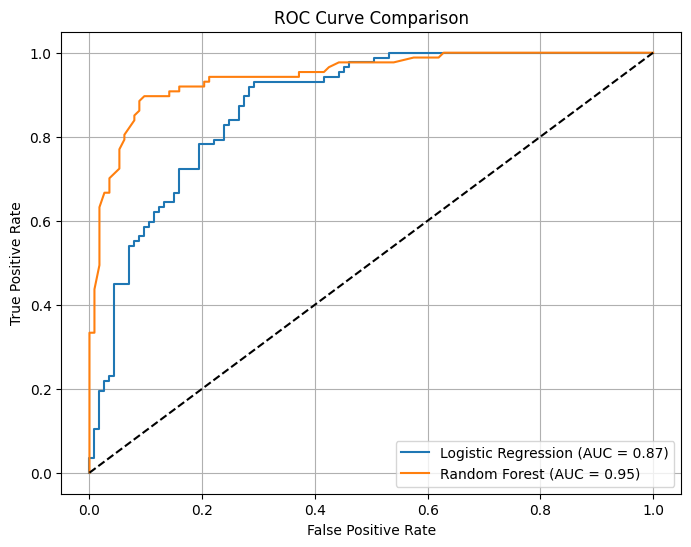

In [ ]:
# Step 7: Plot ROC Curve
plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()